### Importing libraries

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading the dataset

In [78]:
df = pd.read_csv('loan_approval_dataset.csv')

### EDA

In [79]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Checking the info of the dataframe to confirm the dataset is clean or not.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Then, we have to run describe function to get more insights about the data.

In [81]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


### Data cleaning

The string value in some columns and column name includes extra blank space so first I have to strip.

In [82]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [83]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [84]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [85]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [86]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [87]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

We can change categorical data to numerical data with one hot encoding. But here, there are two unique values in those categorical columns. So, I simply change it to 0 or 1.

In [88]:
df['loan_status']=df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)
df['education']=df['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
df['self_employed']=df['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [89]:
df = df.drop(columns=['loan_id'])

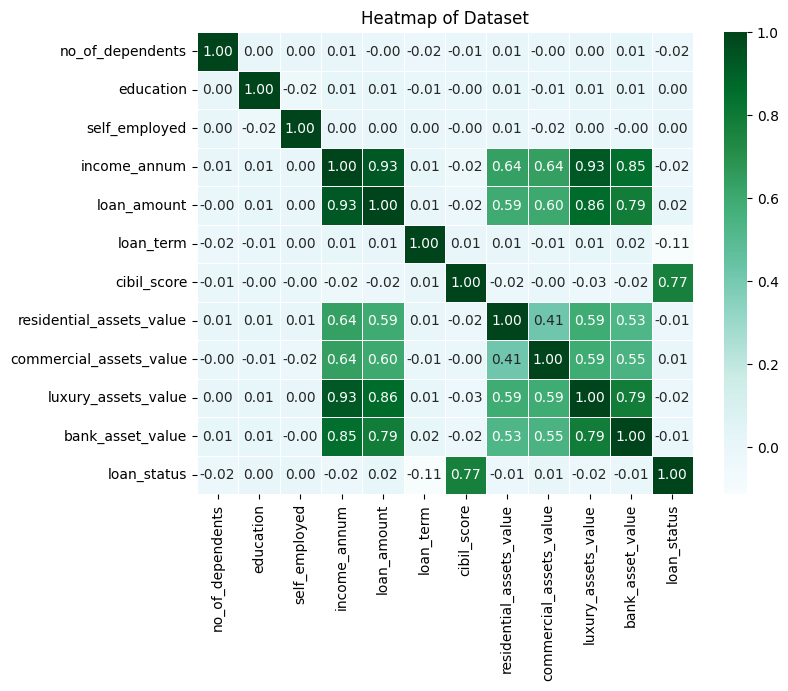

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='BuGn', linewidths=0.5)

plt.title('Heatmap of Dataset')
plt.show()

**According to the heatamp, we can see that the loan_status (target value) depends on cibil_score to 77%.**

Then, we have to check whether it has imbalanced class or not.

In [91]:
df['loan_status'].value_counts()
#here, the Approved examples are about twice as Rejected examples.

loan_status
1    2656
0    1613
Name: count, dtype: int64

Then we have to choose columns for x and y with iloc function.

In [92]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [93]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [94]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

We can see features scale range are so different from each other. So we have to  scales the features to a specific range with StandardScaler.

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_to_scale = ["no_of_dependents", "income_annum", "loan_amount", "loan_term",
                     "cibil_score", "residential_assets_value",
                     "commercial_assets_value", "luxury_assets_value",
                     "bank_asset_value"]
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

Then, we have to split the x and y for train set and test set.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Training

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [98]:
y_pred=model.predict(X_test)

### Evaluation

In [99]:
model.score(X_test, y_test)

0.905152224824356

In [100]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(y_test,y_pred)

0.905152224824356

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(y_test,y_pred)

0.905152224824356

From confusion matrix, we can know true positive, true negative, false positive and false negative.

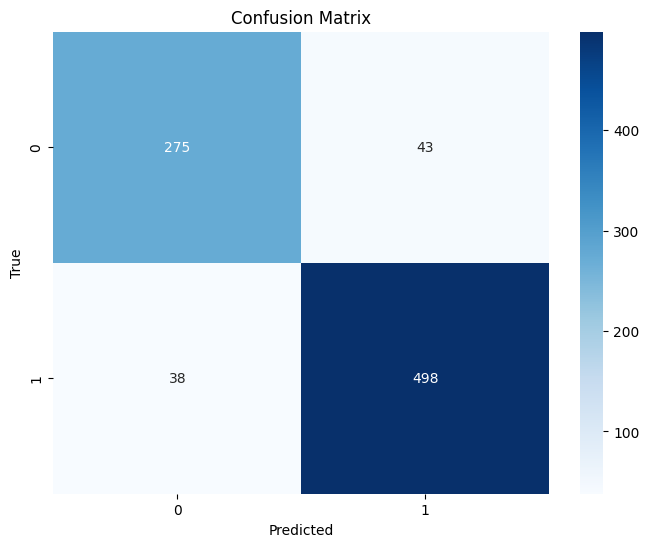

In [102]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()